<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/AI6126_tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[SRCNN论文详解（Image Super-resolution Using Deep Convolutional Networks）](https://www.jianshu.com/p/d73d206943eb)
## 1.简介:
超分辨率(super resolution)的任务目标时将输入的低分辨率的图像转换为高分辨率的图像, 与图像去噪,图像去模糊等一脉相承. 个人认为：超分辨率关注的是从小尺寸到大尺寸图像如何填充新的像素；图像去噪则是关注在图像尺寸不变的情况下，将被“污染”的像素替换为正确的像素。

SRCNN是首个使用CNN结构(即基于深度学习)的端倒短的超分辨率算法,这个相当于什么? 就像faster r-cnn在目标检测的低位一样, 将整个算法流程用深度学习的方法实现了, 并且效果比传统多模块集成的方法好. SRCNN流程如下:首先, 输入预处理. 对输入的低分辨率LR(Low Resolution)图像使用的bicubic算法进行放大, 放大为目标尺寸. 接下来算法的目标就是将输入的比较模糊的LR图像, 经过卷积网络的处理, 得到超分辨率SR(Super Resolution)的图像, 使它尽可能与原图的高分辨率HR图像相似.

## 2. 模型及训练
[SRCNN 网络结构](https://img-blog.csdnimg.cn/20200420101224696.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80NjU1OTI3MQ==,size_16,color_FFFFFF,t_70)

SRCNN的网络结构比较简单, 这个卷积网络包括三个卷积层, 甚至没有池化和全连接层:
1. 对低分辨率的图像进行卷积操作, 生成n1维的feature maps
2. 对n1维的feature map进行卷积操作生成n2维feature maps
3. 对n2维的feature maps进行卷积生成超分辨率的图像.

分别对应三个处理流程:
1. **提取图像特征:** 从低分辨率突袭那个中提取多个patch图像块, 每个块被卷积操作表示为多维的向量(维数等于filter的数量), 所有的特征向量组成特征矩阵(feature maps)
2. **非线性映射:** 将n1维特征矩阵,通过卷积操作实现非线性映射, 变成另一n2维特征矩阵. 
3. **重构图像:** 等于是个反卷积的过程, 将n2的特征矩阵还原为超分辨率图像. 

模型训练的优化参数是三层卷积层对应的卷积和(w)和bias(b), 参数P={W_1,W_2,W_3,b_1,b_2,b_3}. 训练的目标损失是最小化超分辨率图像F(Y;P)与原高分辨率图像X基于像素的均方差MSE,定义如下:
[Loss](https://upload-images.jianshu.io/upload_images/3940902-49808ffab773f063?imageMogr2/auto-orient/strip|imageView2/2/w/344/format/webp) [网址](https://www.jianshu.com/p/d73d206943eb)

其中n是训练样本数量, 即每次训练的样本数量. 接下来无非就是随机梯度下降法反向传播, 网络训练得到最终的参数P使损失L最小化, 参数跟新公式如下:
[参数更新](https://upload-images.jianshu.io/upload_images/3940902-f183b6931966c8f5.png?imageMogr2/auto-orient/strip|imageView2/2/w/571/format/webp) [网址](https://www.jianshu.com/p/d73d206943eb)

## 3. 实验
### 3.1 对比卷积核大小(filter size), 卷积核数量(filter numbers)
**对复原效果的影响的实验**
**结论:** 卷积核数量越多,即特征向量维数越高, 实验效果越好, 但是会影响算法速度, 故需要综合考虑; 另外三层卷积层的卷积和大小越大, 实验效果也会略微更好, 同样会影响算法速度.

### 3.2 对比网络层数(layer numbers) 对复原效果的影响的实验
**结论:** 并非网络越深，效果越好，结果恰恰相反。作者也给出了解释：因为SRCNN没有池化层和全连接层，导致网络对初始参数和学习率非常敏感，结果即网络训练的时候非常难以收敛，即使收敛了也可能停在了坏的局部最小值（bad local minimum）处，并且即使训练了足够的时间，学习到的filter参数的分散度也不够好。

### 3.3 与最前沿的其他超分算法对比速度与性能的实验

数据集选择的是ImageNet上的BSD200、Set14、Set5，对比对象是Bicubic、SC、NE+LLE、KK、ANR、A+与SRCNN。结果如下：
[Set5数据集上实验结果](https://upload-images.jianshu.io/upload_images/3940902-20623e7818ce2801.png?imageMogr2/auto-orient/strip|imageView2/2/w/1200/format/webp)

[Set14数据集上实验结果](https://upload-images.jianshu.io/upload_images/3940902-7316c3d074fe82b2.png?imageMogr2/auto-orient/strip|imageView2/2/w/1200/format/webp)

[BSD200数据集上实验结果](https://upload-images.jianshu.io/upload_images/3940902-7798fd65bc2659cd.png?imageMogr2/auto-orient/strip|imageView2/2/w/1200/format/webp)

[对比算法速度](https://upload-images.jianshu.io/upload_images/3940902-0a3e48deaca24cc2.png?imageMogr2/auto-orient/strip|imageView2/2/w/583/format/webp)

**结论:**
对于复原质量，SRCNN在大部分指标上都表现最好。超分辨率问题（SR）用PSNR作为重建的指标，但是高PSNR并不意味着重建结果好。因为SR是病态问题，这就意味着可能解有无穷多个。以MSE（等价于PSNR）为loss函数得到的解往往是这些可能解的平均，而不是最优解。这就导致以MSE为loss的SR算法得到的结果有些区域看起来过于模糊，缺乏应有的细节。这也是为什么出现了数值评估低，但肉眼看着效果更好的现象。故作者选择了很多项指标来评价复原图像的质量；

对于复原速度，前面提到卷积核大小会影响速度，故作者对比了三种不同卷积核大小的SRCNN与其他算法的速度，总的来说SRCNN的复原速度属于前列水平。

### 3.4  通道对复原效果影响的实验
**结论:** RGB通道联合训练效果最好；YCbCr通道下，Cb、Cr通道对性能提升基本无帮助，只基于Y通道的训练效果更好。

## 4. 小结
SRCNN提出轻量的端到端网络SRCNN来解决超分问题，的确在当时取得了比传统方法性能更强、速度更快的效果，另外作者将基于SC(稀疏编码)的超分方法理解为卷积神经网络的一种形式，都是非常值得阅读的亮点。


# SRCNN Tutorial

In this tutorial, you will learn how to use SRCNN[1] to perform single image super-resolution. Throughout the tutorial, we will use MMEditing to 
* perform inference with SRCNN
* finetune SRCNN on a customized dataset 
Let's start!

[1] Dong *et al.*, Image Super-Resolution Using Deep Convolutional Networks, TPAMI, 2015.

## **Background**

Let's begin with a recap of the background of super-resolution. 

$\quad$

The objective of single image super-resolution (SR) is to recover a high-resolution (HR) image given a low-resolution (LR) image. 

Mathematically, we can model the image degradation process using the following formulation:

\begin{equation}
\mathbf{y} = DK\mathbf{x} + \mathbf{n}.\qquad \text{(1)}
\end{equation}

Here, $\mathbf{x}$ and $\mathbf{y}$ denote the HR and LR images (in vector form), respectively. $D$, $K$, and $\mathbf{n}$ correspond to the downsampling and blurring matrices, and addictive noise, respectively.

Our goal is to reconstruct a HR image $\mathbf{x}$ given the LR image $\mathbf{y}$. In this tutorial, we assume $D$ and $K$ are known, and $\mathbf{n}=0$. 

$\quad$

Now, let's learn how to use MMEditing for SR.

## Install MMEditing 

In [21]:
# Install openmim for installation of mmcv-full
!pip install openmim

# Install mmcv-full thus we could use CUDA operators
!mim install mmcv-full

# Clone MMEditing
!rm -rf mmediting 
!git clone https://github.com/open-mmlab/mmediting.git 
%cd mmediting 

# Isntall MMEditing 
!pip install -v -e .

mmcv-full==1.4.7 existed.
Cloning into 'mmediting'...
remote: Enumerating objects: 10266, done.
remote: Counting objects: 100% (939/939), done.
remote: Compressing objects: 100% (610/610), done.
remote: Total 10266 (delta 448), reused 636 (delta 309), pack-reused 9327
Receiving objects: 100% (10266/10266), 6.61 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (6759/6759), done.
/content/mmediting/mmediting
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils:

In [22]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMEditing installation
import mmedit
print(mmedit.__version__)

1.10.0+cu111 True
0.13.0


## Perform Inference with A Pre-trained SRCNN

### Download checkpoints and images

In [23]:
# Download the pre-trained models
!rm -rf checkpoint
!mkdir checkpoint
!wget -c https://openmmlab.oss-accelerate.aliyuncs.com/mmediting/restorers/srcnn/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth \
      -O ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth

# Download the training and test datasets for later use
!rm -rf ./data
!git clone https://github.com/kckchan-dev/Datasets.git data

--2022-03-28 08:04:04--  https://openmmlab.oss-accelerate.aliyuncs.com/mmediting/restorers/srcnn/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth
Resolving openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)... 47.254.186.225
Connecting to openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85911 (84K) [application/octet-stream]
Saving to: ‘./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth’

./checkpoint/srcnn_ 100%[===================>]  83.90K  --.-KB/s    in 0.02s   

2022-03-28 08:04:06 (3.88 MB/s) - ‘./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth’ saved [85911/85911]

Cloning into 'data'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 228 (delta 6), reused 216 (delta 0), pack-reused 0
Receiving object

### Inference

load checkpoint from local path: ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth


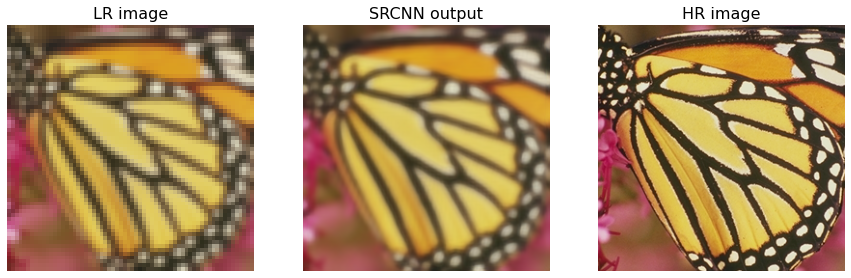

In [24]:
import cv2
import matplotlib.pyplot as plt 
import mmcv
import torch
import torchvision

from mmedit.models import build_model
from mmcv.runner import load_checkpoint

# Build model 
cfg = mmcv.Config.fromfile('configs/restorers/srcnn/srcnn_x4k915_g1_1000k_div2k.py')
model = build_model(cfg.model).cuda()
load_checkpoint(model, './checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth', map_location='cuda')

# Read the images
img_LR = mmcv.imread('./data/Set5/LR/butterfly.png', channel_order='rgb')
img_HR = mmcv.imread('./data/Set5/GT/butterfly.png', channel_order='rgb')

# Cast the input image as a PyTorch FloatTensor
img_SR = torch.from_numpy(img_LR).cuda().float().permute(2,0,1).unsqueeze(0)
img_SR = img_SR / 255 # Input Range = [0, 1]

# Compute the output and cast it back to a numpy array
with torch.no_grad():
    img_SR = model.forward_test(img_SR)['output']
img_SR = torch.clamp(img_SR,0,1) # output range = [0, 1]
img_SR = img_SR.squeeze(0).permute(1, 2, 0).numpy()

# Let's compare the result with the LR and HR images
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1) # 1 row, 3 columns, the top left image 
plt.title('LR image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2) # 2 row, 3 columns, the top right image
plt.title('SRCNN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) # 2 row, 3 columns, the bottom right image  
plt.title('HR image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_LR)
ax2.imshow(img_SR)
ax3.imshow(img_HR)

### The output is much better than the LR input! But it is still a bit blurry, why is that? We will tell you the reason later.

### Filter Visualization 
SRCNN is a convolutional neural network. That means, each layer consists of multiple convolution filters. You may wonder what the learned filters are. Is there any relation between the learned filters and the hand-designed filters, such as Sobel filter, Gaussian filter, etc.? Here, we visualize the filters of the first layer to provide an intuition. This layer directly operates on the input image.


load checkpoint from local path: ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth


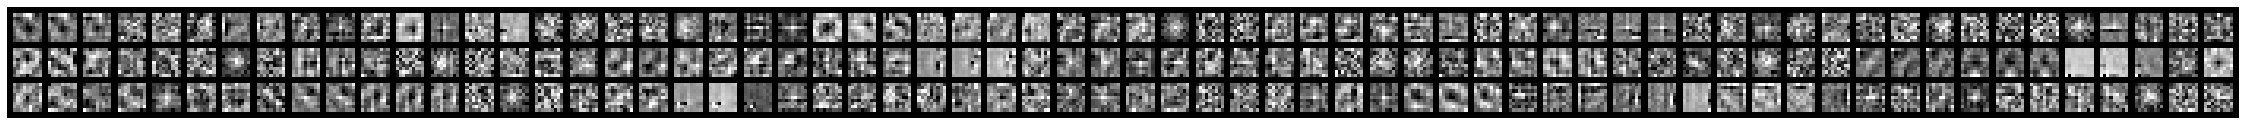

In [25]:
import mmcv 
import torchvision
from mmedit.models import build_model
from mmcv.runner import load_checkpoint

cfg = mmcv.Config.fromfile('configs/restorers/srcnn/srcnn_x4k915_g1_1000k_div2k.py')
model = build_model(cfg.model, train_cfg=None, test_cfg=cfg.test_cfg)
load_checkpoint(model, './checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth', map_location='cpu')
conv1_weight = model.generator.conv1.weight.detach()
n_out, n_in, h, w = conv1_weight.size()
conv1_weight = conv1_weight.view(-1, 1, h, w)
grid_img = torchvision.utils.make_grid(conv1_weight, normalize=True, scale_each=True, nrow=64)
fig = plt.figure(figsize=(40, 30))
plt.axis('off')
plt.imshow(grid_img.permute(1, 2, 0))


We can see that the learned filters are diverse. For example, we can see both isotropic(uniform in all directions) and anisotropic(directional) filters. The outputs of these filters are then fed to the next layer.

While it is easy to interpret the meaning(e.g. edge detection, blurring) of the filters when they are applied to the image, when going deeper, the filters become non-interpretable. 

### Blurring kernel 
As we discussed, the above output is still blurry. Why is that?

The performance of SRCNN(and many other data-driven methods) strongly depends on the training data. When the training data and test data have different distributions, the performance of such methods deteriorate significantly. In fact, the SRCNN we used above is trained with no blurring(K = I), but the input test image is blurred by a Gaussian kernel before downsampling.

In order to improve the output quality, we should train a model using the same degradations. In the following, we will now finetune our pretrained SRCNN using the samping degradations. You will learn how to use MMEditing to train a restorer on a customized dataset. 


### Finetune SRCNN on A Customized Dataset 

To train a new restorer using MMEditing, there are usually three things to do:
1. Support a new dataset
2. Modify the config 
3. Train a new restorer

### Support a new dataset 
To support a new dataset for paired training, there are two things you need to prepare. 
1. Download the LR images and the corresponding HR images. They share the same file name but are put in different directories.
2. Create an annotation file for your dataset. The annotation file contains all the image names and gt image shape. For example:


```
0001_s001.png (480,480,3)
0001_s002.png (480,480,3)
...
```

As an example, we will use a tiny datset obtained from DIV2K. Let's create the annotation file for this training data.

In [26]:
import glob
gt_paths = sorted(glob.glob('./data/DIV2K/GT/*.png'))
with open('data/training_ann.txt', 'w') as f:
  for gt_path in gt_paths:
    filename = gt_path.split('/')[-1]
    line = f'{filename} (480,480,3)\n'
    f.write(line)

# Let's make sure the annotations are correct
with open('data/training_ann.txt', 'r') as f:
  file_content = f.read()
  print(file_content)

0003_s019.png (480,480,3)
0004_s040.png (480,480,3)
0009_s045.png (480,480,3)
0010_s034.png (480,480,3)
0026_s016.png (480,480,3)
0028_s047.png (480,480,3)
0032_s028.png (480,480,3)
0044_s053.png (480,480,3)
0056_s035.png (480,480,3)
0066_s029.png (480,480,3)
0072_s021.png (480,480,3)
0074_s004.png (480,480,3)
0089_s012.png (480,480,3)
0093_s022.png (480,480,3)
0104_s013.png (480,480,3)
0119_s020.png (480,480,3)
0130_s018.png (480,480,3)
0130_s024.png (480,480,3)
0132_s021.png (480,480,3)
0147_s031.png (480,480,3)
0163_s032.png (480,480,3)
0174_s028.png (480,480,3)
0174_s036.png (480,480,3)
0175_s015.png (480,480,3)
0184_s011.png (480,480,3)
0191_s032.png (480,480,3)
0213_s022.png (480,480,3)
0216_s019.png (480,480,3)
0219_s006.png (480,480,3)
0226_s001.png (480,480,3)
0228_s015.png (480,480,3)
0231_s020.png (480,480,3)
0238_s009.png (480,480,3)
0260_s011.png (480,480,3)
0261_s002.png (480,480,3)
0268_s012.png (480,480,3)
0275_s009.png (480,480,3)
0280_s003.png (480,480,3)
0301_s012.pn

### Modify the configuration file 
The next step is to modify the configuration file for training. In this tutorial, we finetune a pre-trained restorer to accelerate the process.

In [27]:
from mmcv import Config
# Load the original config
cfg = Config.fromfile('configs/restorers/srcnn/srcnn_x4k915_g1_1000k_div2k.py')

print(f'Config:\n{cfg.pretty_text}')  # Show the config

Config:
exp_name = 'srcnn_x4k915_g1_1000k_div2k'
scale = 4
model = dict(
    type='BasicRestorer',
    generator=dict(
        type='SRCNN',
        channels=(3, 64, 32, 3),
        kernel_sizes=(9, 1, 5),
        upscale_factor=4),
    pixel_loss=dict(type='L1Loss', loss_weight=1.0, reduction='mean'))
train_cfg = None
test_cfg = dict(metrics=['PSNR', 'SSIM'], crop_border=4)
train_dataset_type = 'SRAnnotationDataset'
val_dataset_type = 'SRFolderDataset'
train_pipeline = [
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key='lq',
        flag='unchanged'),
    dict(
        type='LoadImageFromFile',
        io_backend='disk',
        key='gt',
        flag='unchanged'),
    dict(type='RescaleToZeroOne', keys=['lq', 'gt']),
    dict(
        type='Normalize',
        keys=['lq', 'gt'],
        mean=[0, 0, 0],
        std=[1, 1, 1],
        to_rgb=True),
    dict(type='PairedRandomCrop', gt_patch_size=128),
    dict(
        type='Flip', keys=['lq', 'gt'], f

Given a configuration that trains a model on the whole DIV2K, we need to modify the configuration so that it trains on our tiny dataset.

In [28]:
from mmcv.runner import set_random_seed

# Dataloaders
cfg.data.train_dataloader = dict(samples_per_gpu=16, drop_last=True, persistent_workers=False)
cfg.data.val_dataloader = dict(samples_per_gpu=1, persistent_workers=False)
cfg.data.test_dataloader = dict(samples_per_gpu=1, persistent_workers=False),

# Training folders
cfg.data.train.dataset.lq_folder = './data/DIV2K/LR'
cfg.data.train.dataset.gt_folder = './data/DIV2K/GT'
cfg.data.train.dataset.ann_file = './data/training_ann.txt'

# Validation folders
cfg.data.val.lq_folder = './data/Set5/LR'
cfg.data.val.gt_folder = './data/Set5/GT'

# Test folders
cfg.data.test.lq_folder = './data/Set5/LR'
cfg.data.test.gt_folder = './data/Set5/GT'

# Use the pre-trained SRCNN model
cfg.load_from = './checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth'

# Set up working dir to save files and logs
cfg.work_dir = './tutorial_exps/srcnn'

# Use smaller batch size for training
cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 0
cfg.data.val_workers_per_gpu = 0

# Reduce the number of iterations
cfg.total_iters = 200

# Training scheme
cfg.lr_config = {}
cfg.lr_config.policy = 'Step'
cfg.lr_config.by_epoch = False
cfg.lr_config.step = [100]
cfg.lr_config.gamma = 0.5

# Evaluate every 20 iterations
cfg.evaluation.interval = 20
if cfg.evaluation.get('gpu_collect', None):
  cfg.evaluation.pop('gpu_collect')

# Save the checkpoints every N iterations
cfg.checkpoint_config.interval = 20

# Print out the log every N iterations
cfg.log_config.interval = 5

# Set seed thus the results are reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpus = 1

### Train 
Finally, let's initialize the dataset and restorer, and train a new restorer!

In [30]:
import os.path as osp

from mmedit.datasets import build_dataset
from mmedit.models import build_model
from mmedit.apis import train_model
from mmcv.runner import init_dist

import mmcv
import os

# Initialize distributed training (only need to initialize once), comment it if
# have already run this part
# os.environ['RANK'] = '0'
# os.environ['WORLD_SIZE'] = '1'
# os.environ['MASTER_ADDR'] = '127.0.0.1'
# os.environ['MASTER_PORT'] = '50297'
# init_dist('pytorch', **cfg.dist_params)


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the SRCNN model
model = build_model(
        cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

# Meta information
meta = dict()
if cfg.get('exp_name', None) is None:
    cfg['exp_name'] = osp.splitext(osp.basename(cfg.work_dir))[0]
meta['exp_name'] = cfg.exp_name
meta['mmedit Version'] = mmedit.__version__
meta['seed'] = 0

# Train the model
train_model(model, datasets, cfg, distributed=True, validate=True, meta=meta)


/content/mmediting/mmedit/apis/train.py:196: UserWarning: "val_samples_per_gpu/val_workers_per_gpu" have been deprecated. Please use "val_dataloader=dict(samples_per_gpu=1)" instead. Details see https://github.com/open-mmlab/mmediting/pull/201
  warnings.warn('"val_samples_per_gpu/val_workers_per_gpu" have '
2022-03-28 08:06:32,630 - mmedit - INFO - load checkpoint from local path: ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth
INFO:mmedit:load checkpoint from local path: ./checkpoint/srcnn_x4k915_1x16_1000k_div2k_20200608-4186f232.pth
2022-03-28 08:06:32,635 - mmedit - INFO - Start running, host: root@5f6dae6aba07, work_dir: /content/mmediting/mmediting/tutorial_exps/srcnn
INFO:mmedit:Start running, host: root@5f6dae6aba07, work_dir: /content/mmediting/mmediting/tutorial_exps/srcnn
2022-03-28 08:06:32,639 - mmedit - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook       

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.2 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:06:36,924 - mmedit - INFO - Iter(val) [20]	PSNR: 25.3791, SSIM: 0.6974
INFO:mmedit:Iter(val) [20]	PSNR: 25.3791, SSIM: 0.6974


2022-03-28 08:06:37,884 - mmedit - INFO - Iter [25/200]	lr_generator: 2.000e-04, eta: 0:00:29, time: 0.257, data_time: 0.247, memory: 231, loss_pix: 0.0362, loss: 0.0362
INFO:mmedit:Iter [25/200]	lr_generator: 2.000e-04, eta: 0:00:29, time: 0.257, data_time: 0.247, memory: 231, loss_pix: 0.0362, loss: 0.0362
2022-03-28 08:06:38,843 - mmedit - INFO - Iter [30/200]	lr_generator: 2.000e-04, eta: 0:00:29, time: 0.192, data_time: 0.182, memory: 231, loss_pix: 0.0394, loss: 0.0394
INFO:mmedit:Iter [30/200]	lr_generator: 2.000e-04, eta: 0:00:29, time: 0.192, data_time: 0.182, memory: 231, loss_pix: 0.0394, loss: 0.0394
2022-03-28 08:06:39,799 - mmedit - INFO - Iter [35/200]	lr_generator: 2.000e-04, eta: 0:00:28, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0354, loss: 0.0354
INFO:mmedit:Iter [35/200]	lr_generator: 2.000e-04, eta: 0:00:28, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0354, loss: 0.0354
2022-03-28 08:06:40,764 - mmedit - INFO - Saving checkpoint at 40 iter

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.4 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:06:41,105 - mmedit - INFO - Iter(val) [40]	PSNR: 25.6826, SSIM: 0.7100
INFO:mmedit:Iter(val) [40]	PSNR: 25.6826, SSIM: 0.7100


2022-03-28 08:06:42,067 - mmedit - INFO - Iter [45/200]	lr_generator: 2.000e-04, eta: 0:00:25, time: 0.256, data_time: 0.246, memory: 231, loss_pix: 0.0354, loss: 0.0354
INFO:mmedit:Iter [45/200]	lr_generator: 2.000e-04, eta: 0:00:25, time: 0.256, data_time: 0.246, memory: 231, loss_pix: 0.0354, loss: 0.0354
2022-03-28 08:06:43,107 - mmedit - INFO - Iter [50/200]	lr_generator: 2.000e-04, eta: 0:00:25, time: 0.208, data_time: 0.198, memory: 231, loss_pix: 0.0371, loss: 0.0371
INFO:mmedit:Iter [50/200]	lr_generator: 2.000e-04, eta: 0:00:25, time: 0.208, data_time: 0.198, memory: 231, loss_pix: 0.0371, loss: 0.0371
2022-03-28 08:06:44,052 - mmedit - INFO - Iter [55/200]	lr_generator: 2.000e-04, eta: 0:00:24, time: 0.189, data_time: 0.179, memory: 231, loss_pix: 0.0383, loss: 0.0383
INFO:mmedit:Iter [55/200]	lr_generator: 2.000e-04, eta: 0:00:24, time: 0.189, data_time: 0.179, memory: 231, loss_pix: 0.0383, loss: 0.0383
2022-03-28 08:06:45,019 - mmedit - INFO - Saving checkpoint at 60 iter

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.6 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:06:45,355 - mmedit - INFO - Iter(val) [60]	PSNR: 25.8075, SSIM: 0.7135
INFO:mmedit:Iter(val) [60]	PSNR: 25.8075, SSIM: 0.7135


2022-03-28 08:06:46,327 - mmedit - INFO - Iter [65/200]	lr_generator: 2.000e-04, eta: 0:00:22, time: 0.258, data_time: 0.248, memory: 231, loss_pix: 0.0378, loss: 0.0378
INFO:mmedit:Iter [65/200]	lr_generator: 2.000e-04, eta: 0:00:22, time: 0.258, data_time: 0.248, memory: 231, loss_pix: 0.0378, loss: 0.0378
2022-03-28 08:06:47,295 - mmedit - INFO - Iter [70/200]	lr_generator: 2.000e-04, eta: 0:00:21, time: 0.194, data_time: 0.183, memory: 231, loss_pix: 0.0367, loss: 0.0367
INFO:mmedit:Iter [70/200]	lr_generator: 2.000e-04, eta: 0:00:21, time: 0.194, data_time: 0.183, memory: 231, loss_pix: 0.0367, loss: 0.0367
2022-03-28 08:06:48,320 - mmedit - INFO - Iter [75/200]	lr_generator: 2.000e-04, eta: 0:00:21, time: 0.205, data_time: 0.195, memory: 231, loss_pix: 0.0421, loss: 0.0421
INFO:mmedit:Iter [75/200]	lr_generator: 2.000e-04, eta: 0:00:21, time: 0.205, data_time: 0.195, memory: 231, loss_pix: 0.0421, loss: 0.0421
2022-03-28 08:06:49,302 - mmedit - INFO - Saving checkpoint at 80 iter

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 16.1 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:06:49,628 - mmedit - INFO - Iter(val) [80]	PSNR: 25.9170, SSIM: 0.7161
INFO:mmedit:Iter(val) [80]	PSNR: 25.9170, SSIM: 0.7161


2022-03-28 08:06:50,621 - mmedit - INFO - Iter [85/200]	lr_generator: 2.000e-04, eta: 0:00:18, time: 0.260, data_time: 0.250, memory: 231, loss_pix: 0.0337, loss: 0.0337
INFO:mmedit:Iter [85/200]	lr_generator: 2.000e-04, eta: 0:00:18, time: 0.260, data_time: 0.250, memory: 231, loss_pix: 0.0337, loss: 0.0337
2022-03-28 08:06:51,607 - mmedit - INFO - Iter [90/200]	lr_generator: 2.000e-04, eta: 0:00:18, time: 0.197, data_time: 0.187, memory: 231, loss_pix: 0.0348, loss: 0.0348
INFO:mmedit:Iter [90/200]	lr_generator: 2.000e-04, eta: 0:00:18, time: 0.197, data_time: 0.187, memory: 231, loss_pix: 0.0348, loss: 0.0348
2022-03-28 08:06:52,566 - mmedit - INFO - Iter [95/200]	lr_generator: 2.000e-04, eta: 0:00:17, time: 0.192, data_time: 0.182, memory: 231, loss_pix: 0.0369, loss: 0.0369
INFO:mmedit:Iter [95/200]	lr_generator: 2.000e-04, eta: 0:00:17, time: 0.192, data_time: 0.182, memory: 231, loss_pix: 0.0369, loss: 0.0369
2022-03-28 08:06:53,570 - mmedit - INFO - Saving checkpoint at 100 ite

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.4 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:06:53,909 - mmedit - INFO - Iter(val) [100]	PSNR: 25.9786, SSIM: 0.7184
INFO:mmedit:Iter(val) [100]	PSNR: 25.9786, SSIM: 0.7184


2022-03-28 08:06:54,874 - mmedit - INFO - Iter [105/200]	lr_generator: 1.000e-04, eta: 0:00:15, time: 0.257, data_time: 0.247, memory: 231, loss_pix: 0.0383, loss: 0.0383
INFO:mmedit:Iter [105/200]	lr_generator: 1.000e-04, eta: 0:00:15, time: 0.257, data_time: 0.247, memory: 231, loss_pix: 0.0383, loss: 0.0383
2022-03-28 08:06:55,832 - mmedit - INFO - Iter [110/200]	lr_generator: 1.000e-04, eta: 0:00:14, time: 0.192, data_time: 0.182, memory: 231, loss_pix: 0.0385, loss: 0.0385
INFO:mmedit:Iter [110/200]	lr_generator: 1.000e-04, eta: 0:00:14, time: 0.192, data_time: 0.182, memory: 231, loss_pix: 0.0385, loss: 0.0385
2022-03-28 08:06:56,786 - mmedit - INFO - Iter [115/200]	lr_generator: 1.000e-04, eta: 0:00:14, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0355, loss: 0.0355
INFO:mmedit:Iter [115/200]	lr_generator: 1.000e-04, eta: 0:00:14, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0355, loss: 0.0355
2022-03-28 08:06:57,732 - mmedit - INFO - Saving checkpoint at 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 16.0 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:06:58,060 - mmedit - INFO - Iter(val) [120]	PSNR: 26.0088, SSIM: 0.7208
INFO:mmedit:Iter(val) [120]	PSNR: 26.0088, SSIM: 0.7208


2022-03-28 08:06:59,059 - mmedit - INFO - Iter [125/200]	lr_generator: 1.000e-04, eta: 0:00:12, time: 0.262, data_time: 0.251, memory: 231, loss_pix: 0.0427, loss: 0.0427
INFO:mmedit:Iter [125/200]	lr_generator: 1.000e-04, eta: 0:00:12, time: 0.262, data_time: 0.251, memory: 231, loss_pix: 0.0427, loss: 0.0427
2022-03-28 08:07:00,029 - mmedit - INFO - Iter [130/200]	lr_generator: 1.000e-04, eta: 0:00:11, time: 0.194, data_time: 0.184, memory: 231, loss_pix: 0.0336, loss: 0.0336
INFO:mmedit:Iter [130/200]	lr_generator: 1.000e-04, eta: 0:00:11, time: 0.194, data_time: 0.184, memory: 231, loss_pix: 0.0336, loss: 0.0336
2022-03-28 08:07:01,003 - mmedit - INFO - Iter [135/200]	lr_generator: 1.000e-04, eta: 0:00:10, time: 0.195, data_time: 0.185, memory: 231, loss_pix: 0.0430, loss: 0.0430
INFO:mmedit:Iter [135/200]	lr_generator: 1.000e-04, eta: 0:00:10, time: 0.195, data_time: 0.185, memory: 231, loss_pix: 0.0430, loss: 0.0430
2022-03-28 08:07:01,957 - mmedit - INFO - Saving checkpoint at 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.7 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:07:02,292 - mmedit - INFO - Iter(val) [140]	PSNR: 26.0434, SSIM: 0.7215
INFO:mmedit:Iter(val) [140]	PSNR: 26.0434, SSIM: 0.7215


2022-03-28 08:07:03,245 - mmedit - INFO - Iter [145/200]	lr_generator: 1.000e-04, eta: 0:00:08, time: 0.253, data_time: 0.244, memory: 231, loss_pix: 0.0302, loss: 0.0302
INFO:mmedit:Iter [145/200]	lr_generator: 1.000e-04, eta: 0:00:08, time: 0.253, data_time: 0.244, memory: 231, loss_pix: 0.0302, loss: 0.0302
2022-03-28 08:07:04,198 - mmedit - INFO - Iter [150/200]	lr_generator: 1.000e-04, eta: 0:00:08, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0338, loss: 0.0338
INFO:mmedit:Iter [150/200]	lr_generator: 1.000e-04, eta: 0:00:08, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0338, loss: 0.0338
2022-03-28 08:07:05,191 - mmedit - INFO - Iter [155/200]	lr_generator: 1.000e-04, eta: 0:00:07, time: 0.199, data_time: 0.188, memory: 231, loss_pix: 0.0435, loss: 0.0435
INFO:mmedit:Iter [155/200]	lr_generator: 1.000e-04, eta: 0:00:07, time: 0.199, data_time: 0.188, memory: 231, loss_pix: 0.0435, loss: 0.0435
2022-03-28 08:07:06,157 - mmedit - INFO - Saving checkpoint at 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.5 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:07:06,495 - mmedit - INFO - Iter(val) [160]	PSNR: 26.0583, SSIM: 0.7215
INFO:mmedit:Iter(val) [160]	PSNR: 26.0583, SSIM: 0.7215


2022-03-28 08:07:07,451 - mmedit - INFO - Iter [165/200]	lr_generator: 1.000e-04, eta: 0:00:05, time: 0.255, data_time: 0.244, memory: 231, loss_pix: 0.0354, loss: 0.0354
INFO:mmedit:Iter [165/200]	lr_generator: 1.000e-04, eta: 0:00:05, time: 0.255, data_time: 0.244, memory: 231, loss_pix: 0.0354, loss: 0.0354
2022-03-28 08:07:08,420 - mmedit - INFO - Iter [170/200]	lr_generator: 1.000e-04, eta: 0:00:04, time: 0.194, data_time: 0.184, memory: 231, loss_pix: 0.0379, loss: 0.0379
INFO:mmedit:Iter [170/200]	lr_generator: 1.000e-04, eta: 0:00:04, time: 0.194, data_time: 0.184, memory: 231, loss_pix: 0.0379, loss: 0.0379
2022-03-28 08:07:09,377 - mmedit - INFO - Iter [175/200]	lr_generator: 1.000e-04, eta: 0:00:04, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0394, loss: 0.0394
INFO:mmedit:Iter [175/200]	lr_generator: 1.000e-04, eta: 0:00:04, time: 0.191, data_time: 0.181, memory: 231, loss_pix: 0.0394, loss: 0.0394
2022-03-28 08:07:10,335 - mmedit - INFO - Saving checkpoint at 1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.2 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:07:10,678 - mmedit - INFO - Iter(val) [180]	PSNR: 26.0731, SSIM: 0.7222
INFO:mmedit:Iter(val) [180]	PSNR: 26.0731, SSIM: 0.7222


2022-03-28 08:07:11,667 - mmedit - INFO - Iter [185/200]	lr_generator: 1.000e-04, eta: 0:00:02, time: 0.263, data_time: 0.252, memory: 231, loss_pix: 0.0353, loss: 0.0353
INFO:mmedit:Iter [185/200]	lr_generator: 1.000e-04, eta: 0:00:02, time: 0.263, data_time: 0.252, memory: 231, loss_pix: 0.0353, loss: 0.0353
2022-03-28 08:07:12,633 - mmedit - INFO - Iter [190/200]	lr_generator: 1.000e-04, eta: 0:00:01, time: 0.193, data_time: 0.183, memory: 231, loss_pix: 0.0378, loss: 0.0378
INFO:mmedit:Iter [190/200]	lr_generator: 1.000e-04, eta: 0:00:01, time: 0.193, data_time: 0.183, memory: 231, loss_pix: 0.0378, loss: 0.0378
2022-03-28 08:07:13,621 - mmedit - INFO - Iter [195/200]	lr_generator: 1.000e-04, eta: 0:00:00, time: 0.197, data_time: 0.188, memory: 231, loss_pix: 0.0354, loss: 0.0354
INFO:mmedit:Iter [195/200]	lr_generator: 1.000e-04, eta: 0:00:00, time: 0.197, data_time: 0.188, memory: 231, loss_pix: 0.0354, loss: 0.0354
2022-03-28 08:07:14,586 - mmedit - INFO - Saving checkpoint at 2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 14.3 task/s, elapsed: 0s, ETA:     0s

2022-03-28 08:07:14,951 - mmedit - INFO - Iter(val) [200]	PSNR: 26.0814, SSIM: 0.7223
INFO:mmedit:Iter(val) [200]	PSNR: 26.0814, SSIM: 0.7223


### Understand the log 
From the log, we can have a basic understanding on the training process and know how well the restorer is trained. 

Firstly, the SRCNN pre_trained on DIV2K using bicubic downsampling kernel is loaded. During training you can keep track on the training status, including the current iteration, learning rate, losses, and time per iteration.

Also, evaluation will be done from time to time. From the log we can see that the PSNR keeps increasing, up to 25.9744 dB in just 100 iterations. Here PSNR and SSIM are metrics measuring the "fidelity" of the output to the groundtruth. Higher values indicate better results.

Not bad!

### Test the finetuned SRCNN

In [31]:
from mmedit.apis import single_gpu_test
from mmedit.datasets import build_dataloader
from mmcv.parallel import MMDataParallel


# Build a test dataloader and model
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        samples_per_gpu=1,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False,
        persistent_workers=False)
model = MMDataParallel(model, device_ids=[0])

# Perform the test with single gpu. Saving result images by setting
# save_image and save_path arguments. The two arguments will be passed
# to model.forword_test() where images are saved.
# See https://github.com/open-mmlab/mmediting/blob/8b5c0c5f49e60fd6ab0503031b62dee7832faf72/mmedit/models/mattors/indexnet.py#L72.
outputs = single_gpu_test(model, data_loader, save_image=True,
                          save_path='./tutorial_exps/srcnn/results')

# Pop out some unnecessary arguments
eval_config = cfg.evaluation
eval_config.pop('interval')
eval_config.pop('save_image', False)
eval_config.pop('save_path', None)

eval_res = dataset.evaluate(outputs, **eval_config)
print()  # endline of progress bar
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 5/5, 15.5 task/s, elapsed: 0s, ETA:     0s
PSNR: 26.0814
SSIM: 0.7223


The result is the same as the last validation! This is because we use the same data for test and validation. Next, let's take a look at the visual results of the test! The results are saved in the directory tutorial_exps/srcnn/results that we specified.

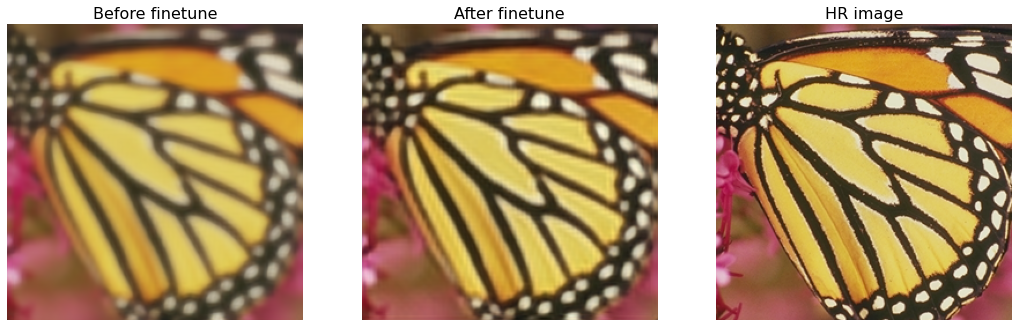

In [32]:
import cv2
import matplotlib.pyplot as plt 
import mmcv
import torch 
import torchvision

from mmedit.models import build_model 
from mmcv.runner import load_checkpoint

# Read the images
img_SR_ft = mmcv.imread('./tutorial_exps/srcnn/results/butterfly.png', channel_order='rgb')


# let's compare the result with the LR and HR images
fig = plt.figure(figsize=(18, 16))
ax1 = fig.add_subplot(1, 3, 1)  # 2 rows, 2 columns, the top left image  
plt.title('Before finetune', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)  # 2 rows, 2 columns, the top right image 
plt.title('After finetune', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3)  # 2 rows, 2 columns, the bottom right image  
plt.title('HR image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_SR)
ax2.imshow(img_SR_ft)
ax3.imshow(img_HR)

### What to Do Next?

Single image super-resolution is just a part of the super-resolution family. There are more waiting for you to explore. For example, you can take a look at the following works:

1. Reference-based image super-resolution - [SRNTT](https://arxiv.org/abs/1903.00834), [C2-Matching](https://yumingj.github.io/projects/C2_matching.html)
2. Video super-resolution - [EDVR](https://arxiv.org/abs/1905.02716), [BasicVSR](https://ckkelvinchan.github.io/projects/BasicVSR/), [BasicVSR++](https://ckkelvinchan.github.io/projects/BasicVSR++/)
3. Real-World Video Super-Resolution - [RealBasicVSR](https://github.com/ckkelvinchan/RealBasicVSR)

Enjoy!